# CAIM Lab Session 1: Powerlaws

In this session you will:

- Do simple preprocessing with `nltk`
- Learn about power laws, a special case being Zipf's law
- Investigate whether _Don Quijote_ follows Zipf and Herden's power laws

In [ ]:
# uncomment in case you need to install nltk
!pip install nltk--user

## 1. On preprocessing (with `nltk`)

For this first project, you may use the very popular [natural language tooklit library](https://www.nltk.org) which provides useful language processing functionality.

In what follows you can see some examples of the type of preprocessing that we will use during the course.

- _Tokenization:_ is the process that splits a sequence of characters into a sequence of word types (or _tokens_)

- _Lower case folding_: turning all characters to lowercase

- _Stopword removal:_ removes tokens that correspond to functional words (or _stopwords_)

- _Stemming:_ mapping word types to their stem (normalization)





In [ ]:
from pprint import pprint

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

In [6]:
## tokenizer

from nltk.tokenize import word_tokenize

text = """Primera parte del ingenioso hidalgo don Quijote de la Mancha.
  Capitulo primero. Que trata de la condicion y ejercicio del famoso hidalgo
  don Quijote de la Mancha"""

tokenized_text = word_tokenize(text)

pprint(tokenized_text)

['Primera',
 'parte',
 'del',
 'ingenioso',
 'hidalgo',
 'don',
 'Quijote',
 'de',
 'la',
 'Mancha',
 '.',
 'Capitulo',
 'primero',
 '.',
 'Que',
 'trata',
 'de',
 'la',
 'condicion',
 'y',
 'ejercicio',
 'del',
 'famoso',
 'hidalgo',
 'don',
 'Quijote',
 'de',
 'la',
 'Mancha']


In [7]:
## stopword removal, punctuation removal, lower-case folding

from nltk.corpus import stopwords
import string

spanish_sw = set(stopwords.words('spanish') + list(string.punctuation))

print(f'there are {len(spanish_sw)} stopwords in Spanish (including punctuation), which are: {spanish_sw}')

filtered_tokenized_text = [w.lower() for w in tokenized_text if w.lower() not in spanish_sw]
pprint(filtered_tokenized_text)

there are 345 stopwords in Spanish (including punctuation), which are: {'*', 'tú', 'donde', 'hubimos', 'haya', 'tuvisteis', 'fuese', 'o', 'estabais', 'tiene', 'tuvierais', 'teniendo', 'hubieron', 'habidos', 'pero', 'habríamos', 'hay', 'estarás', 'sentidos', '!', 'tendrán', '}', 'teníais', 'fui', 'estuviste', 'son', 'habida', 'estuvieron', 'y', 'seáis', 'estuvieras', 'estuve', 'también', 'mías', 'más', '{', 'tuvieran', 'somos', 'tuvieses', 'tuyo', 'estad', 'su', 'sin', '$', 'estos', 'hubiesen', 'fuesen', 'el', 'este', 'hasta', 'tuyas', "'", 'vosotras', 'eran', 'desde', 'estaba', 'seríais', 'muchos', 'tuviese', 'ya', 'hubieran', 'suyas', 'tendría', 'antes', 'tendríais', 'ese', 'tendrían', 'mí', 'vuestra', 'le', 'tengo', 'tendremos', 'tenía', 'entre', 'tenéis', '_', 'ellas', 'nuestras', 'serán', 'sentida', 'tuviéramos', 'poco', 'estáis', 'eso', 'otras', 'habréis', 'tenías', 'esta', 'estuvo', 'siente', 'sus', 'habrás', 'sobre', 'estemos', 'hubiera', 'tuviésemos', 'seré', 'otra', 'tuvieron'

In [8]:
## stemmer

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

stemmed_text = [stemmer.stem(w) for w in filtered_tokenized_text]
pprint(stemmed_text)

['primer',
 'part',
 'ingeni',
 'hidalg',
 'don',
 'quijot',
 'manch',
 'capitul',
 'primer',
 'trat',
 'condicion',
 'ejercici',
 'famos',
 'hidalg',
 'don',
 'quijot',
 'manch']


In [9]:
## useful for counting words

from collections import Counter

word_counts = Counter(stemmed_text)
pprint(word_counts)

word_counts_no_stem = Counter(filtered_tokenized_text)
pprint(word_counts_no_stem)

Counter({'primer': 2,
         'hidalg': 2,
         'don': 2,
         'quijot': 2,
         'manch': 2,
         'part': 1,
         'ingeni': 1,
         'capitul': 1,
         'trat': 1,
         'condicion': 1,
         'ejercici': 1,
         'famos': 1})
Counter({'hidalgo': 2,
         'don': 2,
         'quijote': 2,
         'mancha': 2,
         'primera': 1,
         'parte': 1,
         'ingenioso': 1,
         'capitulo': 1,
         'primero': 1,
         'trata': 1,
         'condicion': 1,
         'ejercicio': 1,
         'famoso': 1})


## 2. On powerlaws

Consider a function $y=f(x)$, that we will call a "law" relating $y$ with $x$.

__Example 1.__ You are given a bucket of some radioactive isotope. $x$ is the number of seconds since you were given
the bucket. $y$ is the number of atoms that disintegrate at the $x$th second.
Each atom decides independently from all other atoms whether to disintegrate in the next second (or
nanosecond, or whatever). From here you can see that $f$ will have the form $y=c \cdot x^{-a}$,
where $c$ depends on the number of atoms you were given, and $a$ depends on the isotope. In particular,
$a>1$ determines the half-life of the isotope.

__Example 2.__ $x$ is number of seconds and $y$ is the number of people entering a metro station during the next
10 minutes. You may have been told in statistics that $f$ is given by the Poisson distribution
(at least for ideal people and metro stations).

Many natural and artificial phenomena come in distributions that are neither exponential nor Poisson,
but so-called power laws. Intuitively, we have $y$ evolves like $x^a$, where $a$ is a constant called
the _exponent_ of the power law. If $a$ is positive, $y$ is increasing, and if $a$ is negative,
$y$ decreases.

More precisely, a power law is
$$
y = c \cdot (x+b)^a
$$
for three constants $a$, $b$, and $c$.

There is a lot of theory about why powerlaws are ubiqutous. They are often related to self-organization,
fractality, complex dynamical systems, etc. The Web and social networks are full of powerlaws.
So is human language, social sciences (population of cities), and natural sciences (intensity of earthquakes,
relation of size and metabolism in animals).

A powerlaw with exponent $-1$ is called Zipf's law, after Mr. Zipf. By extension, sometimes powerlaws with
negative exponents are also called Zipfian laws.

In what follows we will fit some datasets to the best powerlaw that we can find - and see that they pretty close.
Note that this does NOT mean that the phenomenon generating the dataset is exactly a powerlaw.
Proving seriously that a law is (or is not) a powerlaw is another matter.


## 3. Looking at "Don Quijote"

In this exercise, we will be looking at Zipf's and Heap's text laws of the classical text _Don Quijote_. The full plain text is publicly available in many places. You should do a basic preprocessing before counting words. For this exercise, it is better if you _do not remove stopwords_ since we are trying to reflect the full word frequency distribution, including stopwords.


In [31]:
# load don quijote, e.g. as in:

import urllib.request

target_url = "https://fegalaz.usc.es/~gamallo/aulas/lingcomputacional/corpus/quijote-es.txt"

data = urllib.request.urlopen(target_url)

# print first N lines only as a demo
N = 10
for _ in range(N):
    line = next(data)
    print(line.decode('latin-1').strip())

Primera parte del ingenioso hidalgo don Quijote de la Mancha
Capítulo primero. Que trata de la condición y ejercicio del famoso hidalgo
don Quijote de la Mancha
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho
tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua,
rocín flaco y galgo corredor. Una olla de algo más vaca que carnero,
salpicón las más noches, duelos y quebrantos los sábados, lantejas los
viernes, algún palomino de añadidura los domingos, consumían las tres
partes de su hacienda. El resto della concluían sayo de velarte, calzas de
velludo para las fiestas, con sus pantuflos de lo mesmo, y los días de


---

__Exercise 1.__ Use `python` + `matplotlib` or similar library to plot the frequence of words in `don quijote` in decreasing order.

---

Is it a powerlaw? Or, can it be approximated by a powerlaw?

A trick about powerlaws is the following. Let's forget about the $b$ parameter for a second (or equivalently assume that $b = 0$),
so our powerlaw looks like
$$
y = c \cdot x^a.
$$

Taking logs on both sides, it becomes
$$
\log y = a \cdot \log x + \log c
$$

I.e., $\log y$ is a linear function of $\log x$.

---

Counter({'que': 20414,
         'y': 17982,
         'de': 17952,
         'la': 10227,
         'a': 9718,
         'en': 8110,
         'el': 8076,
         'no': 6275,
         'los': 4701,
         'se': 4644,
         'con': 4170,
         'por': 3883,
         'las': 3427,
         'lo': 3416,
         'le': 3380,
         'su': 3334,
         'don': 2628,
         'del': 2452,
         'me': 2325,
         'como': 2242,
         'quijote': 2156,
         'sancho': 2142,
         'es': 2124,
         'yo': 2061,
         'más': 2020,
         'si': 1938,
         'un': 1910,
         'dijo': 1804,
         'al': 1701,
         'mi': 1686,
         'para': 1435,
         'porque': 1385,
         'ni': 1348,
         'una': 1318,
         'él': 1270,
         'tan': 1220,
         'o': 1190,
         'todo': 1169,
         'sin': 1142,
         'respondió': 1063,
         'así': 1059,
         'ser': 1054,
         'señor': 1054,
         'ha': 1046,
         'bien': 1041,
        

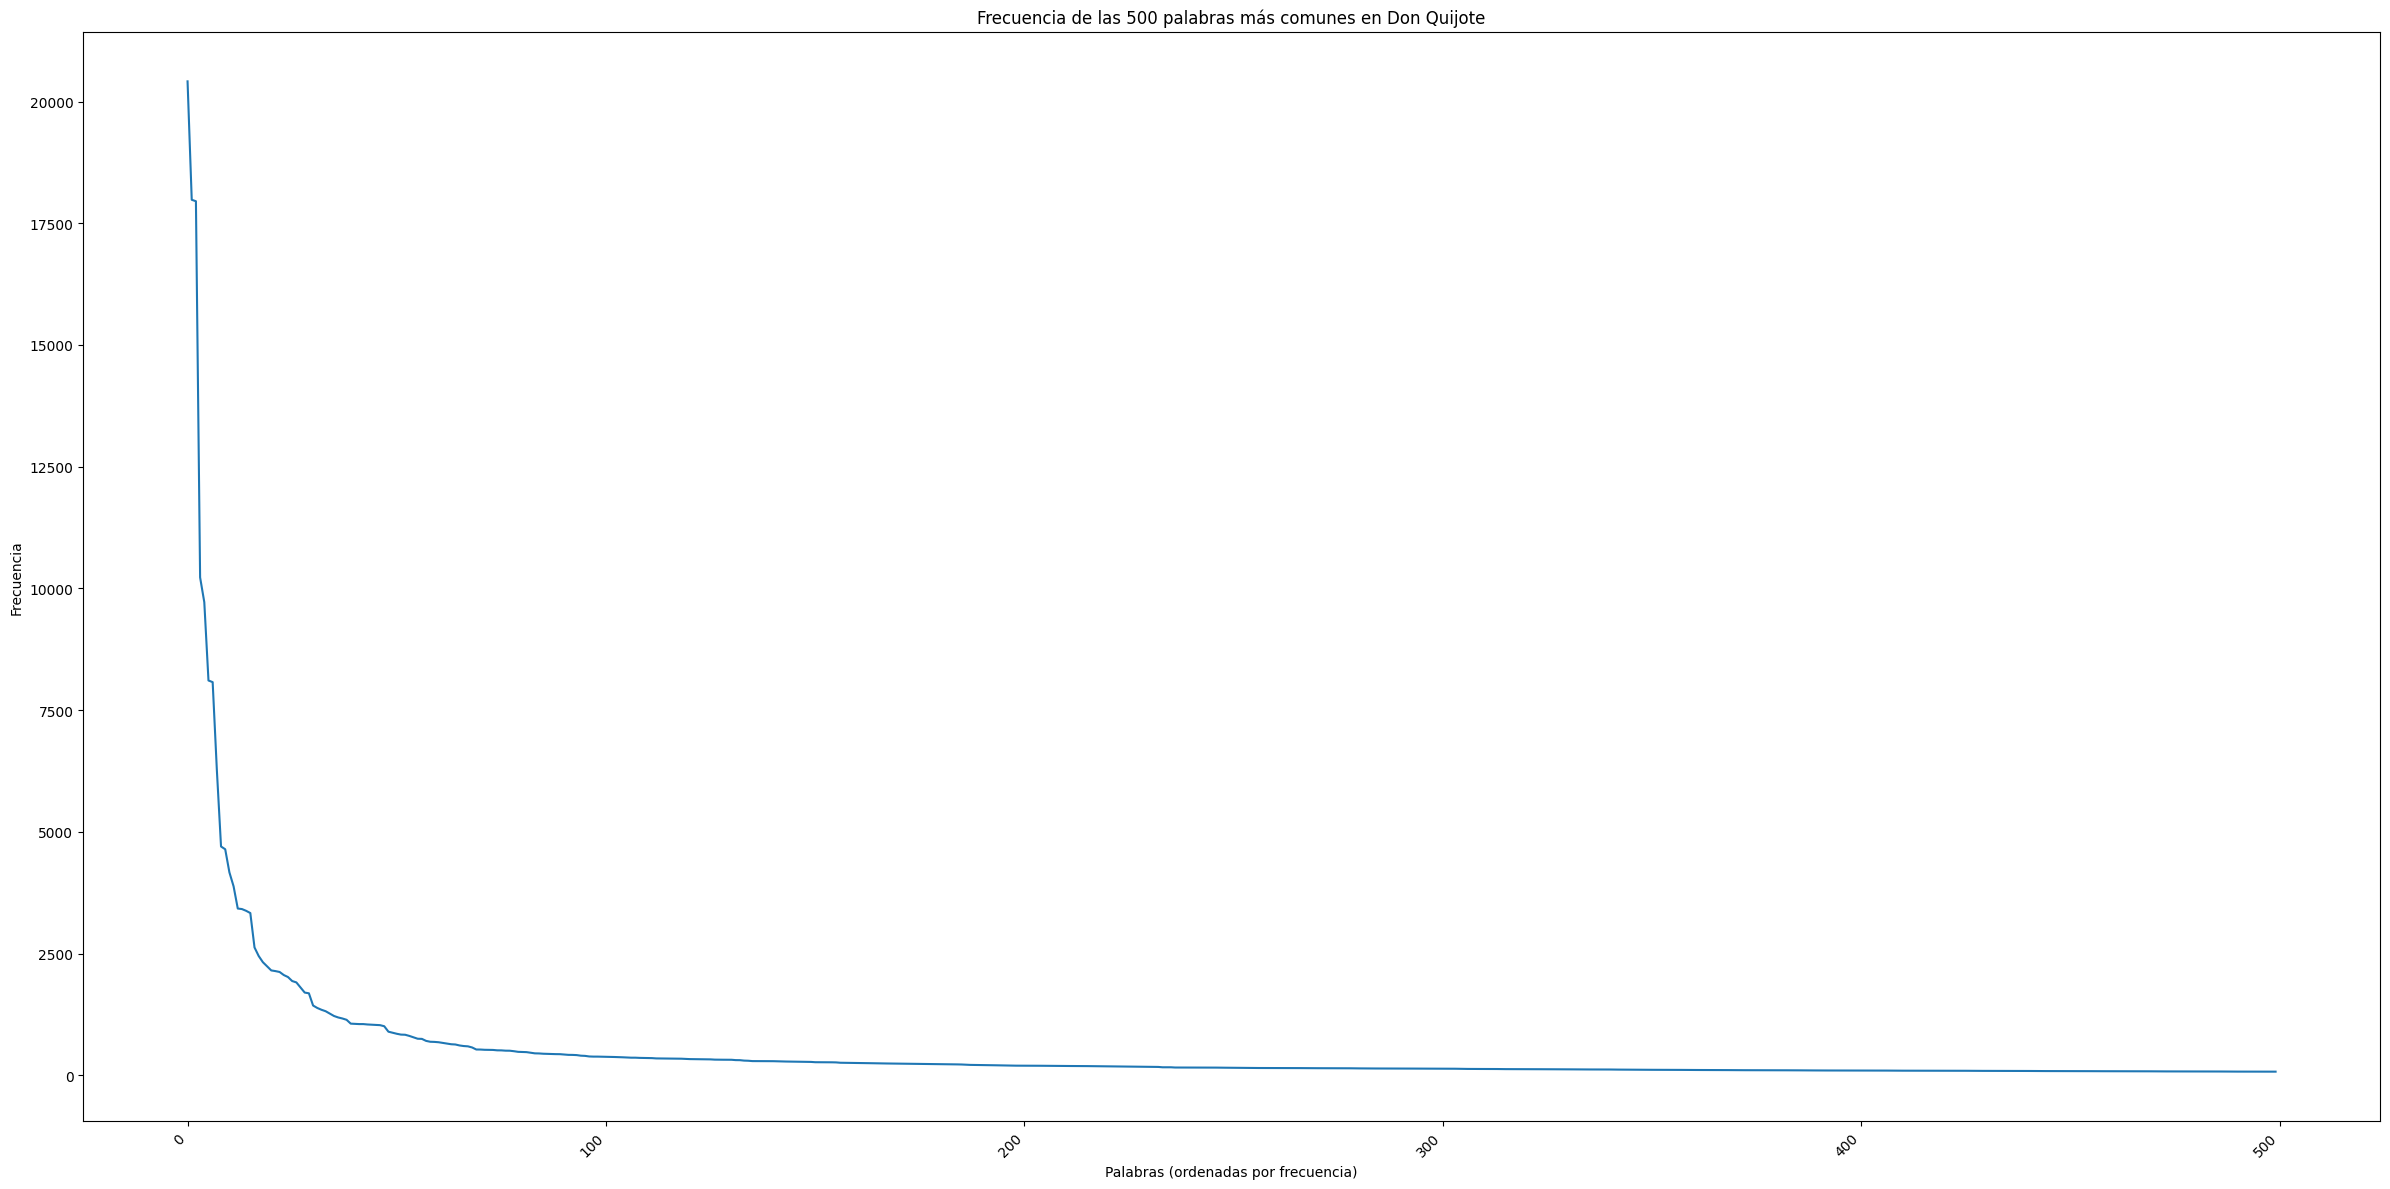

In [65]:
# Contar las palabras y ordenarlas en orden decreciente (hacer un grafico para poder ver los resultados) hacer una regresion lineal
# para encontrar el exponente de la pendiente
from nltk.tokenize import word_tokenize
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from collections import Counter
import string
import urllib.request

target_url = "https://fegalaz.usc.es/~gamallo/aulas/lingcomputacional/corpus/quijote-es.txt"

data = urllib.request.urlopen(target_url)

# Primero tokenizamos el texto
text = data.read().decode('latin-1')
text = text.replace("-"," ").replace("¿"," ").replace("¡"," ")

tokenized_text = word_tokenize(text)

# Luego filtramos el texto para poner todas las palabras en minuscula
spanish_sw = set(list(string.punctuation))
filtered_tokenized_text = [w.lower() for w in tokenized_text if w not in spanish_sw]

word_counts = Counter(filtered_tokenized_text)

pprint(word_counts)
pprint(len(word_counts))

# Obtener las palabras y sus frecuencias ordenadas de mayor a menor
most_common = word_counts.most_common(500) 

position = list(range(len(most_common)))
counts = [count for word, count in most_common]
    
# Realizamos el grafico con las 200 palabras mas repetidas 
plt.figure(figsize=(24, 12))
plt.plot(range(500), counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Palabras (ordenadas por frecuencia)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 500 palabras más comunes en Don Quijote')
plt.tight_layout()
plt.show()


__Exercise 2.__ Now, plot the same but use _logarithmic_ $x$ and $y$ axes.

---

If our distribution is a powerlaw, this plot should be a straight line, whose slope is $a$
and intercept is $\log c$. If we put back the $b$ parameter, it distorts a bit the
low values, so in order to estimate $a$ and $c$ we have to pay attention to the large values.

__You can try different preprocessing steps to see whether the distribution is closer to a powerlaw or not. For example, if you do not stem you may obtain a distribution that resembles more a powerlaw.__

---

In [72]:
# Contar las palabras y ordenarlas en orden decreciente (hacer un grafico para poder ver los resultados) hacer una regresion lineal
# para encontrar el exponente de la pendiente
from nltk.tokenize import word_tokenize
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from collections import Counter
import string
import urllib.request
import math

target_url = "https://fegalaz.usc.es/~gamallo/aulas/lingcomputacional/corpus/quijote-es.txt"

data = urllib.request.urlopen(target_url)

# Primero tokenizamos el texto
text = data.read().decode('latin-1')
text = text.replace("-"," ").replace("¿"," ").replace("¡"," ")

tokenized_text = word_tokenize(text)

# Luego filtramos el texto para poner todas las palabras en minuscula
spanish_sw = set(list(string.punctuation))
filtered_tokenized_text = [w.lower() for w in tokenized_text if w not in spanish_sw]

word_counts = Counter(filtered_tokenized_text)

# Obtener las palabras y sus frecuencias ordenadas de mayor a menor
most_common = word_counts.most_common(500) 

position = list(range(len(most_common)))
counts = [count for word, count in most_common]
counts = list(map(lambda x: math.log(x), counts))
position = list(map(lambda y: math.log(y), position))

# Graficar en escala log-log
plt.figure(figsize=(24, 12))
plt.plot(position, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Rango de palabra')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 500 palabras más comunes en Don Quijote (escala log-log)')
plt.tight_layout()
plt.show()

ValueError: math domain error

__Exercise 3.__ Let's find $a$ and $c$ analytically.
Assume we have $\log y = a \cdot \log x + \log c$.

Take two distinct _large_ values of $x$, find their corresponding values of $y$,
set up a system of two linear equations, and solve for $a$ and $c$.
The solution will probably not fit very well the low values of $x$. You can try to
make it better by adding the $b$ parameter, but don't agonize over it.

Alternatively, use linear regression to estimate the _slope_  ($a$ parameter) and the intercept ($\log c$ parameter).

---

__Exercise 4.__  Now, it is time to check whether Heap's law applies in the _Don Quijote_. First, plot number of different words (word _types_) as a function of text length. Next, plot it on a log-log scale. You should see a straight line. Finally, give an estimate of $\beta$ parameter of Heap's law:

$$  d = k \cdot N^{\beta} $$

---

## 4. Rules of delivery

- To be solved in _pairs_.

- No plagiarism; don't discuss your work with other teams. You can ask for help to others for simple things, such as recalling a python instruction or module, but nothing too specific to the session.

- If you feel you are spending much more time than the rest of the classmates, ask us for help. Questions can be asked either in person or by email, and you'll never be penalized by asking questions, no matter how stupid they look in retrospect.

- Write a short report listing the solutions to the exercises proposed. Include things like: how did you find the best $a$, $b$, $c$ parameter values for the text laws? Please include plots that compare the fitted powerlaws with the real data (preferably in log-log scale). You are welcome to add conclusions and findings that depart from what we asked you to do. We encourage you to discuss the difficulties you find; this lets us give you help and also improve the lab session for future editions.

- Turn the report to PDF. Make sure it has your names, date, and title.

- Submit your work through the [raco](http://www.fib.upc.edu/en/serveis/raco.html). There will be a `Practica` open for each report.

- Deadline: Work must be delivered __within 2 weeks__ from the end of the lab session. Late submissions risk being penalized or not accepted at all. If you anticipate problems with the deadline, tell us as soon as possible.